# The MNIST dataset

The **MNIST database** (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. (Source: [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database))

We download the dataset from [Kaggle](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv). It is given in a simpler format than the original MNIST dataset, a CSV file.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt 
import torch

In [2]:
mnist = pd.read_csv('../datasets/mnist_train.csv')

Let us study the dataset.

In [21]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [3]:
display(mnist)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
28*28

784

Each row in the dataset has 785 columns. The first column, called `label`, is the digit that was drawn by the user. The rest of the columns are numbers from 0 to 255 that represent the grayscale level of each pixel in the 28x28 image.

We reorganize elements in the dataset as a 28x28 matrix.

In [23]:
torch.tensor(mnist.iloc[0, 1:].values, dtype=torch.float32).view(28,28)

tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,

We can plot the handwritten digits by coloring the pixels according to their grayscale level.

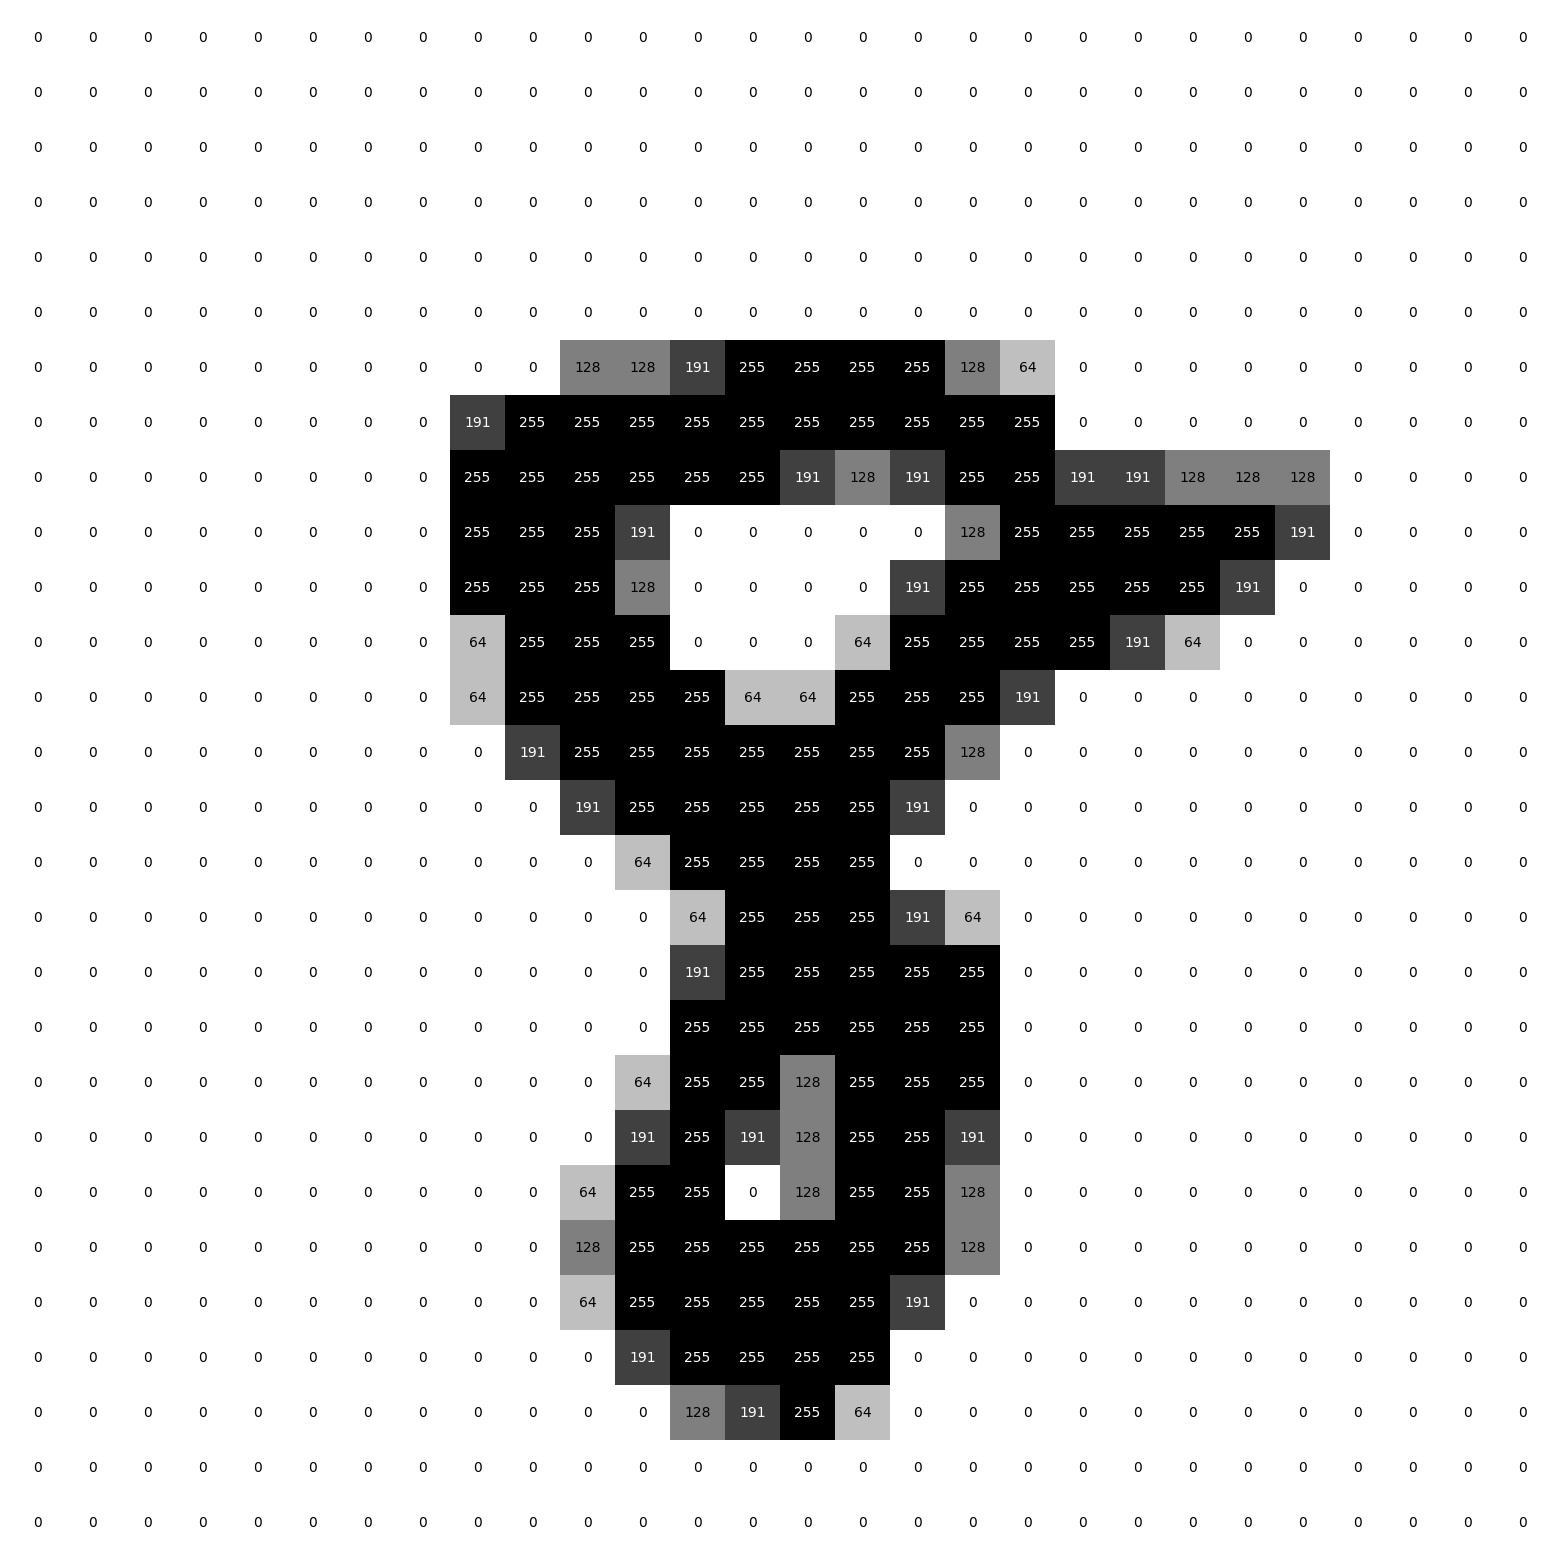

In [ ]:
i = torch.randint(0, mnist.shape[0], (1,)).item() # random sample in the dataset
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1) 
ax.axis('off')
image = torch.tensor(mnist.iloc[i, 1:].values, dtype=torch.float32).view(28,28)
ax.imshow(image, cmap='gray_r')

for y_index in torch.arange(28):
  for x_index in torch.arange(28):
    value = image[y_index, x_index].item()
    label = f"{value:.0f}"
    text_x = x_index
    text_y = y_index
    if value > 256/2:
      adapted_grey = (1,1,1)
    else:
      adapted_grey = (0,0,0)
    ax.text(text_x, text_y, label, color=adapted_grey, ha='center', va='center')


Let us see some examples of labeled handwritten digits.

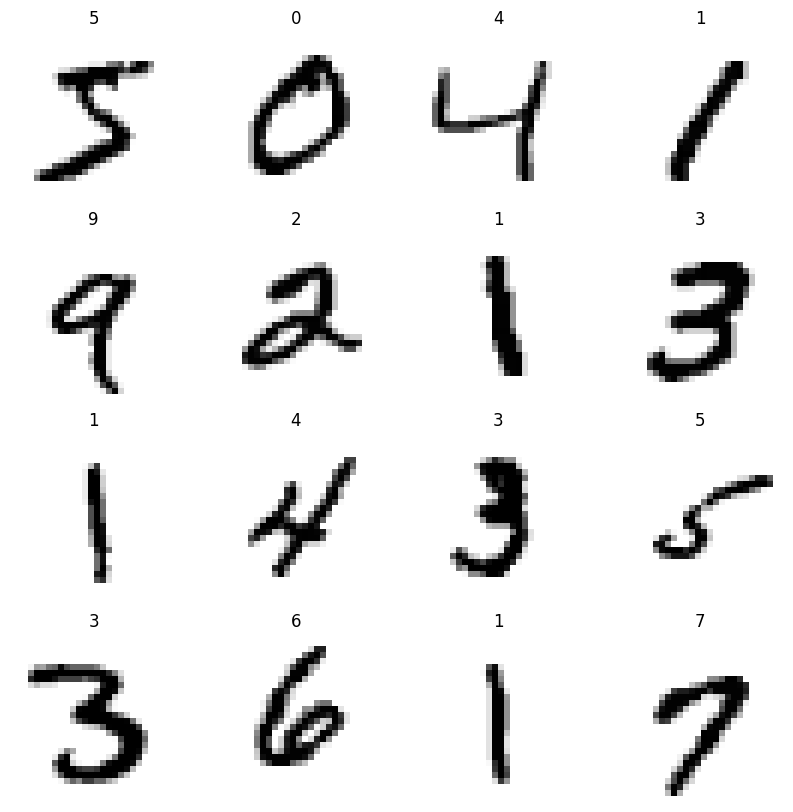

In [24]:
fig = plt.figure(figsize=(10, 10))
axs = []
N = 4
for i in range(N*N):
  axs.append(fig.add_subplot(N,N,i+1)) # we create an axis
for i in range(N*N):
  axs[i].axis('off') # we turn off the axis
  axs[i].imshow(torch.tensor(mnist.iloc[i,1:].values, dtype=torch.float32).view(28, 28), cmap='gray_r') # we plot the image
  axs[i].set_title(mnist.iloc[i,0]) # we set the title of the image
